# Predicting the amount of Cement

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz

#데이터 분할 : train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [2]:
df_raw = pd.read_csv('Data/Concrete.csv', encoding = 'cp949')

In [4]:
# 목표변수 데이터 지정
df_raw_y = df_raw['CEMENT']

In [5]:
# 설명변수 데이터 지정
df_raw_x = df_raw.drop('CEMENT', axis = 1, inplace = False)

In [6]:
# 이상치 확인
df_raw.describe()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
# 결측값 확인
df_raw_y.isnull().sum()

0

In [8]:
# 결측값 확인
df_raw_x.isnull().sum()

BLAST_FURNACE_SLAG               0
FLY_ASH                          0
WATER                            0
SUPERPLASTICIZER                 0
COARSE_AGGREGATE                 0
FINE_AGGREGATE                   0
AGE                              0
CONCRETE_COMPRESSIVE_STRENGTH    0
dtype: int64

In [9]:
#  train(0.4) : validation(0.3) : test(0.3)으로 데이터 분할

df_tt_x, df_test_x, df_tt_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_tt_x, df_tt_y, test_size = 0.42857, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (412, 8)
train data Y size : (412,)
validation data X size : (309, 8)
validation data Y size : (309,)
test data X size : (309, 8)
test data Y size : (309,)


# 의사 결정 나무 (Decision Tree)

In [10]:
# 기본 모델 피팅
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [11]:
# Train 데이터 설명력
print('Score on training set: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print('Score on test set: {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.844


모델 설명력은 99.8%로 OverFitting!!

In [12]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []
# min_samples_leaf : 잎사귀 최소 자료 수
para_leaf = [n_leaf * 2 for n_leaf in range (1,40)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234
                                , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_val_x, df_val_y)) 

In [13]:
# 결과 DataFrame에 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [14]:
# 파라미터에 따른 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.989,0.809
1,4,0.961,0.776
2,6,0.905,0.695
3,8,0.846,0.687
4,10,0.795,0.624
5,12,0.785,0.600
6,14,0.756,0.578
7,16,0.757,0.546
8,18,0.731,0.550
9,20,0.725,0.554


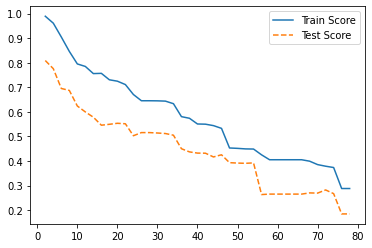

In [15]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

잎사귀 노드 최소 자료 수 증가에 따라 train, test의 설명력이 다음과 같은 관계를 보인다고 볼 수 있습니다. 
Train, Test의 설명력이 가장 큰 부분인 1을 선택합니다.

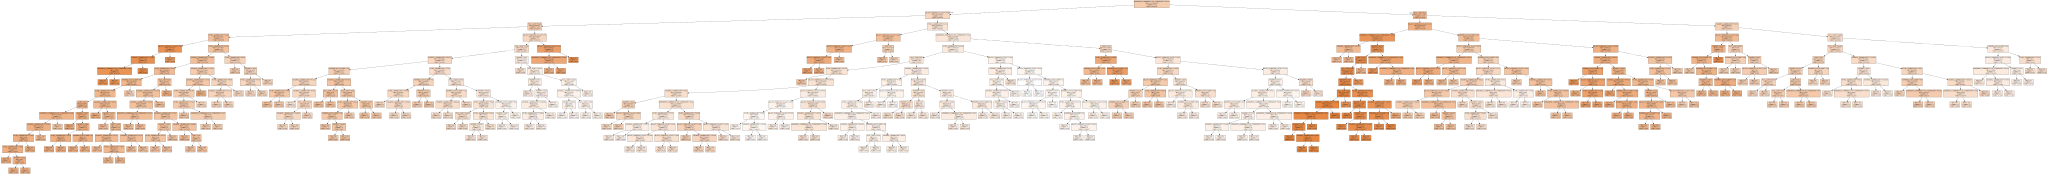

In [17]:
# 변수명 저장
# 결과 DataFrame에 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
v_feature_name = df_train_x.columns

# 노드의 최소 자료 수 1 모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 1)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = 'tree_leaf.dot',
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [18]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []
# min_samples_split : 분리 노드의 최소 자료 수

para_split = [n_split * 2 for n_split in range (2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 4321 
                                ,min_samples_leaf=1
                                ,min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_val_x, df_val_y))  

In [19]:
# 결과 DataFrame에 저장
df_score_split = pd.DataFrame()
df_score_split['MinSplitsLeaf'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [20]:
# 파라미터에 따른 모델 설명력 확인
df_score_split.round(3)

,MinSplitsLeaf,TrainScore,TestScore
0,4,0.997,0.792
1,6,0.986,0.822
2,8,0.976,0.811
3,10,0.961,0.802
4,12,0.947,0.807
5,14,0.937,0.792
6,16,0.928,0.787
7,18,0.919,0.759
8,20,0.914,0.758
9,22,0.912,0.755


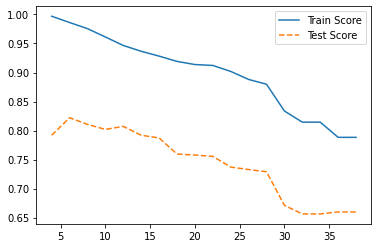

In [21]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

분리 노드의 최소 자료 수 증가에 따라 train, test의 설명력이 다음과 같은 관계를 보인다고 볼 수 있습니다. 설명률의 변화를 고려하여 7 선택합니다.

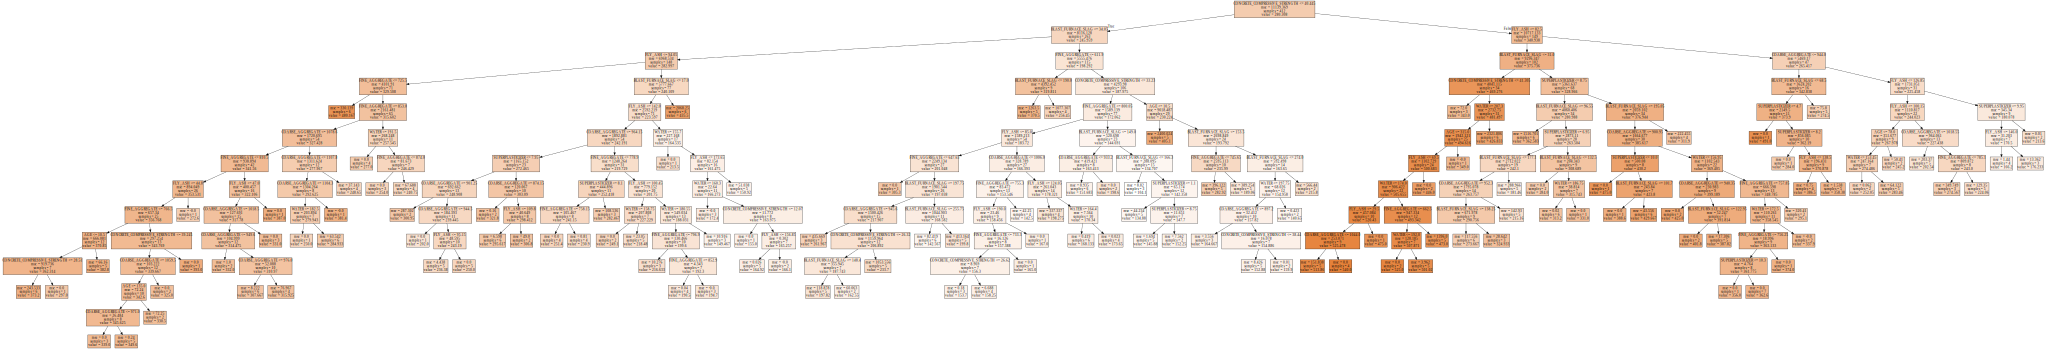

In [22]:
# 분리 노드의 최소 자료 수 7 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=1, min_samples_split=7)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_split.dot',
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [23]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []
# min_samples_leaf : 분리 노드의 최소 자료 수
para_depth = [depth for depth in range (1,15)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234
                                ,min_samples_leaf=1, min_samples_split = 7,
                                max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_val_x, df_val_y))  

In [24]:
# 결과 DataFrame에 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [25]:
# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.187,0.150
1,2,0.373,0.299
2,3,0.598,0.484
3,4,0.765,0.607
4,5,0.863,0.712
5,6,0.910,0.768
6,7,0.944,0.776
7,8,0.964,0.802
8,9,0.974,0.830
9,10,0.977,0.816


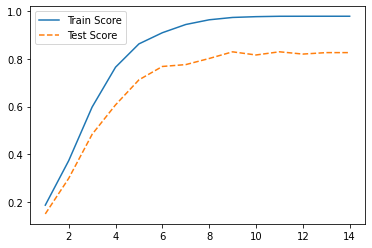

In [26]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

트리의 최대 깊이 증가에 따라 train, test의 설명력이 다음과 같은 관계를 보인다고 볼 수 있습니다. 
train과 test가 가장 급격하게 증가하는 위치인 9을 선택합니다.

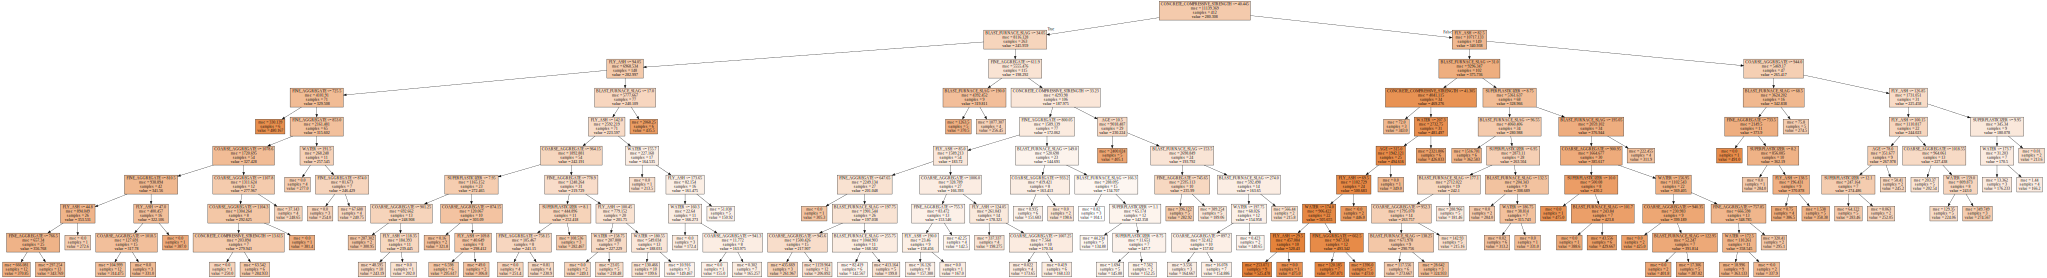

In [27]:
# 트리의 최대 깊이 9 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=1, min_samples_split=7,
                                   max_depth=9)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_depth.dot',
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_depth.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [28]:
# 최종 모델 시각화
my_tree = DecisionTreeRegressor(random_state = 1234,min_samples_leaf=1,min_samples_split=7,max_depth=9)

In [29]:
my_tree.fit(df_train_x, df_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=7,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [125]:
# Score을 계산하는 방법
# 트리의 마지막 노드에 대해 목표 변수 FAT에 대한  
# Train 데이터 설명력
print('Score on training set: {:.3f}'.format(my_tree.score(df_train_x, df_train_y)))

# Test 데이터 설명력
print('Score on test set: {:.3f}'.format(my_tree.score(df_test_x, df_test_y)))

Score on training set: 0.974
Score on test set: 0.844


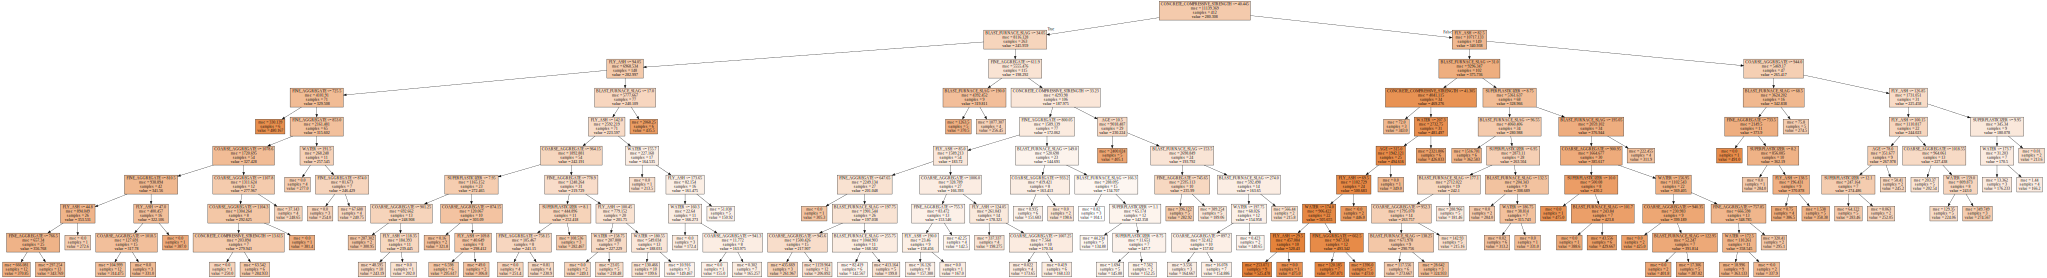

In [31]:
# 최종 모델 시각화
export_graphviz(my_tree, out_file = 'tree_final.dot',
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [32]:
# 설명 변수의 중요도

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = my_tree.feature_importances_

Text(0, 0.5, 'Variable')

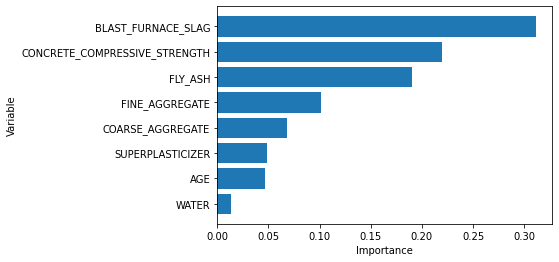

In [33]:
# 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Importance')
plt.ylabel('Variable')

# 결론 

따로 전처리를 해 주지 않았는데도 최종 스코어 값이 0.844가 나왔다. 대체로 준수하다고 볼 수 있다. 

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV 

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [35]:
import os
os.environ["PATH"] += os.pathsep + "usr/lib/x86_64-linux-gnu/graphviz" 

# 랜덤 포레스트 (Random Forest)

In [113]:
# n_estimators 파라미터 확인

train_score = []
val_score = []
para = [i*10 for i in range(1,26)]
for i in para :
    rf = RandomForestRegressor(random_state=2234, n_estimators=i)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    val_score.append(rf.score(df_val_x, df_val_y))

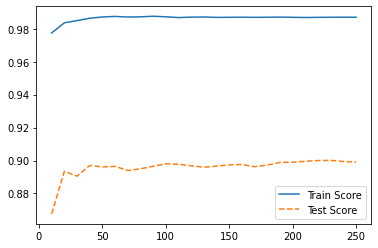

In [114]:
df_score = pd.DataFrame()
df_score["Parameter"] = para
df_score["TrainScore"] = train_score
df_score["TestScore"] = val_score
df_score["Overfit"] = list(np.array(train_score)-np.array(val_score)) 
# 이 숫자가 클 수록 Overfitting 의심됨

plt.plot(para, train_score, linestyle="-", label="Train Score")
plt.plot(para, val_score, linestyle="--", label="Test Score")
plt.legend()
plt.show()

n의 증가에 따라 train, test의 설명력이 다음과 같은 관계를 보인다고 볼 수 있습니다. train과 test가 가장 급격하게 감소한 뒤 안정을 찾는 위치인 40을 선택합니다.

In [116]:
# min_samples_split 파라미터 확인

train_score = []
val_score = []
para = [i*2 for i in range(1,21)]
for i in para :
    rf = RandomForestRegressor(random_state=6695, n_estimators=40, min_samples_leaf=5, min_samples_split=i)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    val_score.append(rf.score(df_val_x, df_val_y))

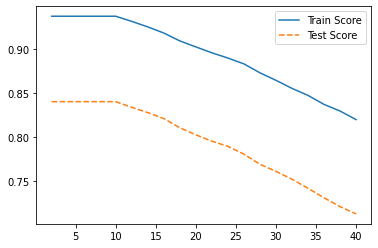

In [117]:
df_score = pd.DataFrame()
df_score["Parameter"] = para
df_score["TrainScore"] = train_score
df_score["TestScore"] = val_score
df_score["Overfit"] = list(np.array(train_score)-np.array(val_score)) 
# 이 숫자가 클 수록 Overfitting 의심됨

plt.plot(para, train_score, linestyle="-", label="Train Score")
plt.plot(para, val_score, linestyle="--", label="Test Score")
plt.legend()
plt.show()

sample split의 증가에 따라 train, test의 설명력이 다음과 같은 관계를 보인다고 볼 수 있습니다. train과 test가 가장 큰 설명력을 갖는 위치인 11을 선택합니다.

In [118]:
# max_depth 파라미터 확인

train_score = []
val_score = []
para = [i*2 for i in range(1,21)]
for i in para :
    rf = RandomForestRegressor(random_state=6635, n_estimators=40, min_samples_leaf=5, min_samples_split=11, max_depth=i)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    val_score.append(rf.score(df_val_x, df_val_y))

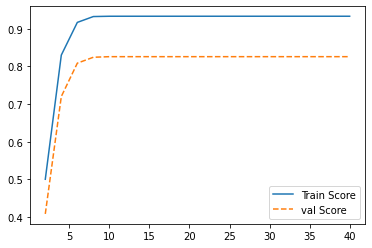

In [119]:
df_score = pd.DataFrame()
df_score["para"] = para
df_score["TrainScore"] = train_score
df_score["ValScore"] = val_score
df_score["Overfit"] = list(np.array(train_score)-np.array(val_score))
plt.plot(para, train_score, linestyle="-", label="Train Score")
plt.plot(para, val_score, linestyle="--", label="val Score")
plt.legend()
plt.show()

최대 깊이의 증가에 따라 train, test의 설명력이 다음과 같은 관계를 보인다고 볼 수 있습니다. train과 test가 가장 큰 설명력을 갖는 위치인 7을 선택합니다.

In [122]:
# 최종 모델링
rf_final = RandomForestRegressor(random_state=8828, n_estimators=40, min_samples_leaf=5,min_samples_split=11,max_depth=7)
rf_final.fit(df_train_x, df_train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=11, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=8828, verbose=0, warm_start=False)

In [123]:
# 평가
print("Score on training set:{:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set:0.918
Score on test set:0.850


# 결론 

따로 전처리를 해 주지 않았는데도 최종 스코어 값이 0.850가 나왔다. 대체로 준수하다고 볼 수 있다.

# 그래디언트 부스팅 (Gradient Boosting)

In [74]:
## n_estimators 파라미터 확인
train_score = []
val_score = []
para = [i*10 for i in range(1,11)]
for i in para :
    gb = GradientBoostingRegressor(random_state=1234,n_estimators= i)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    val_score.append(gb.score(df_val_x, df_val_y))
   

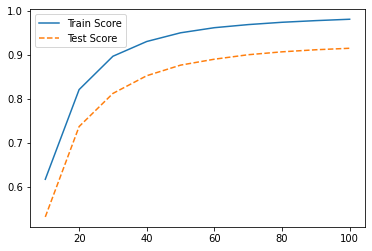

In [75]:
df_score = pd.DataFrame()
df_score["Parameter"] = para
df_score["TrainScore"] = train_score
df_score["TestScore"] = val_score
df_score["Overfit"] = list(np.array(train_score)-np.array(val_score)) 
# 이 숫자가 클 수록 Overfitting 의심됨

plt.plot(para, train_score, linestyle="-", label="Train Score")
plt.plot(para, val_score, linestyle="--", label="Test Score")
plt.legend()
plt.show()

n의 증가에 따라 train, test의 설명력이 다음과 같은 관계를 보인다고 볼 수 있습니다. train과 test가 가장 급격하게 증가하는 위치인 20을 선택합니다.

In [66]:
df_score.round(3)

,Parameter,TrainScore,TestScore,Overfit
0,10,0.617,0.531,0.086
1,20,0.820,0.736,0.084
2,30,0.896,0.812,0.084
3,40,0.930,0.852,0.078
4,50,0.950,0.876,0.073
5,60,0.961,0.890,0.072
6,70,0.968,0.900,0.068
7,80,0.973,0.906,0.067
8,90,0.977,0.911,0.066
9,100,0.980,0.914,0.066


In [76]:
## min_samples_leaf 파라미터 확인
train_score = []
val_score = []
para = [i*1 for i in range(1,21)]
for i in para :
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=20, min_samples_leaf= i)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    val_score.append(gb.score(df_val_x, df_val_y))

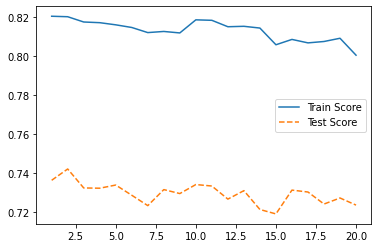

In [77]:
df_score = pd.DataFrame()
df_score["Parameter"] = para
df_score["TrainScore"] = train_score
df_score["TestScore"] = val_score
df_score["Overfit"] = list(np.array(train_score)-np.array(val_score))
plt.plot(para, train_score, linestyle="-", label="Train Score")
plt.plot(para, val_score, linestyle="--", label="Test Score")
plt.legend()
plt.show()

n의 증가에 따라 train, test의 설명력이 다음과 같은 관계를 보인다고 볼 수 있습니다. train과 test가 가장 높은 값을 보이는 위치인 10을 선택합니다.

In [78]:
df_score.round(3)

,Parameter,TrainScore,TestScore,Overfit
0,1,0.820,0.736,0.084
1,2,0.820,0.742,0.078
2,3,0.818,0.733,0.085
3,4,0.817,0.732,0.085
4,5,0.816,0.734,0.082
5,6,0.815,0.729,0.086
6,7,0.812,0.723,0.089
7,8,0.813,0.732,0.081
8,9,0.812,0.730,0.082
9,10,0.819,0.734,0.084


In [81]:
## max_depth 파라미터 확인
train_score = []
val_score = []
para = [i*0.5 for i in range(1,25)]
for i in para :
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=20, min_samples_leaf= 10, max_depth=i)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    val_score.append(gb.score(df_val_x, df_val_y))

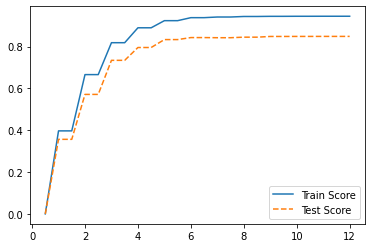

In [82]:
df_score = pd.DataFrame()
df_score["para"] = para
df_score["TrainScore"] = train_score
df_score["TestScore"] = val_score
df_score["Overfit"] = list(np.array(train_score)-np.array(val_score))
plt.plot(para, train_score, linestyle="-", label="Train Score")
plt.plot(para, val_score, linestyle="--", label="Test Score")
plt.legend()
plt.show()

깊이의 증가에 따라 train, test의 설명력이 다음과 같은 관계를 보인다고 볼 수 있습니다. 
특히 2구간, 3구간 4구간에 계단처럼 가파르게 증가하는 부분이 인상적입니다.
train과 test가 가장 높은 증가폭을 보이는 위치인 2,3,4를 후보로 선택합니다.

In [89]:
## learning_rate 파라미터 확인
train_score = []
val_score = []
para = [i*0.05 for i in range(1,10)]
for i in para :
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=20, min_samples_leaf= 10, max_depth=3, learning_rate=i)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    val_score.append(gb.score(df_val_x, df_val_y))

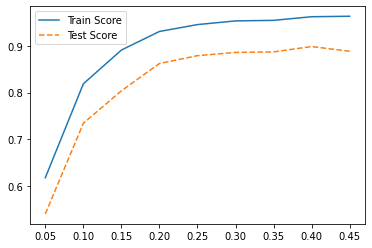

In [90]:
df_score = pd.DataFrame()
df_score["para"] = para
df_score["TrainScore"] = train_score
df_score["TestScore"] = val_score
df_score["Overfit"] = list(np.array(train_score)-np.array(val_score))
plt.plot(para, train_score, linestyle="-", label="Train Score")
plt.plot(para, val_score, linestyle="--", label="Test Score")
plt.legend()
plt.show()

깊이의 증가에 따라 train, test의 설명력이 다음과 같은 관계를 보인다고 볼 수 있습니다. 가장 안정적인 위치인 0.30을 선택합니다.

In [129]:
# 최종 모델링
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=100, min_samples_leaf= 10, max_depth=3, learning_rate=0.5)
gb_final.fit(df_train_x , df_train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [131]:
# 평가
print("Score on training set : {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x,df_test_y)))

Score on training set : 0.993
Score on test set : 0.926


# 결론 

따로 전처리를 해 주지 않았는데도 최종 스코어 값이 0.926이 나왔다. 대체로 준수하다고 볼 수 있다.
세 모델 중 가장 큰 점수를 얻었다!!